# Set up

## Package Loading

In [ ]:
import pandas as pd
import numpy as np
import itertools
!pip install emoji
import emoji
import re
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, make_scorer
import matplotlib.pyplot as plt
import time
import joblib
!pip install spacy
import spacy
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 6.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=74d7b79b397c0e631cf970855e84394d6c0e2d16e9e88b70aa13bd95eb403192
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Mounted at /content/drive


## Set Up paths

In [ ]:
# Parent paths
google_path = '/content/drive/My Drive/'
#local_path = '/home/v.zevallosm/'
parent_path = google_path

#Specific paths
path_train = parent_path+"team project/data set/dataset search/twitter_and_cyberbullying/data.csv" 
#path_test = parent_path+"team project/data set/dataset search/Twitter Sentiment Analysis/test_tweet.csv" 
path_preprocessed = parent_path+"data_set_team_project/preprocessed/preprocessed_data_final.csv"

#path_hyperparameters_sgd = parent_path+"team project/codes/models/best parameters/sgd.csv"
#path_hyperparameters_svm = parent_path+"team project/codes/models/best parameters/svm.csv"
#path_hyperparameters_et = parent_path+"team project/codes/models/best parameters/et.csv"
#path_hyperparameters_rf = parent_path+"team project/codes/models/best parameters/rf.csv"
#path_hyperparameters_nb = parent_path+"team project/codes/models/with_lemmatization_nltk/nb.csv"
#path_hyperparameters_knn = parent_path+"team project/codes/models/best parameters/knn.csv"
#path_hyperparameters_lr = parent_path+"team project/codes/models/best parameters/lr.csv"
#path_hyperparameters_dt = parent_path+"team project/codes/models/best parameters/dt.csv"

#path_best_parameters_sgd = parent_path+"team project/codes/models/sgd.pkl"
#path_best_parameters_svm = parent_path+"team project/codes/models/svm.pkl"
#path_best_parameters_et = parent_path+"team project/codes/models/et.pkl"
#path_best_parameters_rf = parent_path+"team project/codes/models/rf.pkl"
#path_best_parameters_nb = parent_path+"team project/codes/models/with_lemmatization_nltk/nb.pkl"
#path_best_parameters_knn = parent_path+"team project/codes/models/knn.pkl"
#path_best_parameters_lr = parent_path+"team project/codes/models/lr.pkl"
#path_best_parameters_dt = parent_path+"team project/codes/models/dt.pkl"

## Set Up Functions

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Data Exploration

In [ ]:
train = pd.read_csv(path_train)
#test = pd.read_csv(path_test)

In [ ]:
#train.drop(columns=['id'], inplace=True)
print(train.shape)
#print(test.shape)
print()
print(train.label.unique())
print(train.isnull().any())
#print(test.isnull().any())
train.head()


(79654, 2)

[0 1]
tweet    False
label    False
dtype: bool


,tweet,label
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


# Data Preprocessing

## Tokenization and stopword removal

In [ ]:
sp = spacy.load('en_core_web_sm')
stop = sp.Defaults.stop_words

train['tweet'] = train['tweet'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in (stop)]))
train.head()

,tweet,label
0,"In words # katandandre , food crapilicious ! #...",0
1,Why # aussietv white ? # MKR # theblock # ImAC...,0
2,@ XochitlSuckkks classy whore ? Or red velvet ...,0
3,"@ Jason_Gio meh . : P thanks heads , concerned...",0
4,@ RudhoeEnglish This ISIS account pretending K...,0


## Tokenization and lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

train['tweet'] = train['tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
train.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,tweet,label
0,"In word # katandandre , food crapilicious ! # mkr",0
1,Why # aussietv white ? # MKR # theblock # ImAC...,0
2,@ XochitlSuckkks classy whore ? Or red velvet ...,0
3,"@ Jason_Gio meh . : P thanks head , concerned ...",0
4,@ RudhoeEnglish This ISIS account pretending K...,0


## Emoji replacement 



In [ ]:
train['tweet'] = train['tweet'].apply(lambda x: emoji.demojize(x, language='en'))
train.head()

,tweet,label
0,"In word # katandandre , food crapilicious ! # mkr",0
1,Why # aussietv white ? # MKR # theblock # ImAC...,0
2,@ XochitlSuckkks classy whore ? Or red velvet ...,0
3,"@ Jason_Gio meh . : P thanks head , concerned ...",0
4,@ RudhoeEnglish This ISIS account pretending K...,0


# Balance Dataset

In [ ]:
# loading preprocessd data
#df = pd.read_csv(path_proprocessed)
df = train
df.rename(columns = {'tweet':'text'}, inplace = True)
df = df[df['text'].apply(lambda x: isinstance(x, str))] # Temporal solution

(79654, 2)


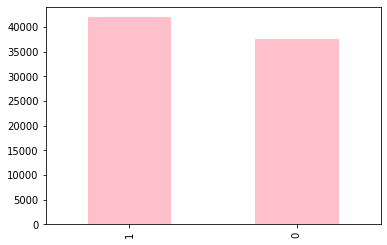

In [ ]:
df['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))
print(df.shape)

# Create csv with preprocessed data 

In [ ]:
df.to_csv(path_preprocessed, index=False) 